**1. Imports:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: __MACOSX/._data         
   creating: data/paper/
  inflating: __MACOSX/data/._paper   
   creating: data/metal/
  inflating: __MACOSX/data/._metal   
   creating: data/cardboard/
  inflating: __MACOSX/data/._cardboard  
   creating: data/glass/
  inflating: __MACOSX/data/._glass   
   creating: data/plastic/
  inflating: __MACOSX/data/._plastic  
  inflating: data/paper/paper283.jpg  
  inflating: __MACOSX/data/paper/._paper283.jpg  
  inflating: data/paper/paper297.jpg  
  inflating: __MACOSX/data/paper/._paper297.jpg  
  inflating: data/paper/paper526.jpg  
  inflating: __MACOSX/data/paper/._paper526.jpg  
  inflating: data/paper/paper240.jpg  
  inflating: __MACOSX/data/paper/._paper240.jpg  
  inflating: data/paper/paper254.jpg  
  inflating: __MACOSX/data/paper/._paper254.jpg  
  inflating: data/paper/paper532.jpg  
  inflating: __MACOSX/data/paper/._paper532.jpg  
  inflating: data/paper/paper268.jpg  
  inflating: __MACOSX/data

**2. Data preparation:**

In [3]:
file_path="data"

x=[]

for folder in os.listdir(file_path):
    sub_path=file_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img        
        img_arr=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        x.append(img_arr)

In [4]:
x=np.array(x)

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [6]:
training_set = train_datagen.flow_from_directory(file_path, target_size = (384, 512),
                                                 batch_size = 120, class_mode = "categorical")

Found 2390 images belonging to 5 classes.


In [7]:
train_y=training_set.classes

training_set.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4}

In [8]:
train_y.shape

(2390,)

**2. First model:**

In [9]:
first_model = Sequential([
    Conv2D(filters=8, kernel_size=3, padding='same', activation='relu', 
           input_shape=(384, 512, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=10, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=12, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=14, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=18, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Dropout(0.5),

    Flatten(),
    
    Dense(5, activation='softmax')
])

first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 384, 512, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 192, 256, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 256, 10)      730       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 96, 128, 10)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 128, 12)       1092      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 64, 12)       0

In [10]:
first_model.compile(optimizer="adam", 
                    loss="sparse_categorical_crossentropy", 
                    metrics=["accuracy"])

early_stop=EarlyStopping(monitor="accuracy",
                         mode="auto",
                         verbose=1,
                         patience=10)

In [11]:
first_results = first_model.fit(x,
                                train_y,
                                validation_split=0.05,
                                epochs=200,
                                callbacks=[early_stop])

Epoch 1/200
71/71 [==============================] - 21s 139ms/step - loss: 2.0794 - accuracy: 0.2467 - val_loss: 1.6565 - val_accuracy: 0.0667
Epoch 2/200
71/71 [==============================] - 9s 120ms/step - loss: 1.5244 - accuracy: 0.3432 - val_loss: 1.8904 - val_accuracy: 0.0000e+00
Epoch 3/200
71/71 [==============================] - 9s 120ms/step - loss: 1.4640 - accuracy: 0.3617 - val_loss: 1.7525 - val_accuracy: 0.0917
Epoch 4/200
71/71 [==============================] - 9s 120ms/step - loss: 1.4836 - accuracy: 0.3498 - val_loss: 1.6822 - val_accuracy: 0.0500
Epoch 5/200
71/71 [==============================] - 9s 121ms/step - loss: 1.4156 - accuracy: 0.3912 - val_loss: 1.3732 - val_accuracy: 0.3917
Epoch 6/200
71/71 [==============================] - 9s 121ms/step - loss: 1.3720 - accuracy: 0.4207 - val_loss: 1.6157 - val_accuracy: 0.1500
Epoch 7/200
71/71 [==============================] - 9s 120ms/step - loss: 1.3682 - accuracy: 0.4062 - val_loss: 1.4282 - val_accuracy: 0

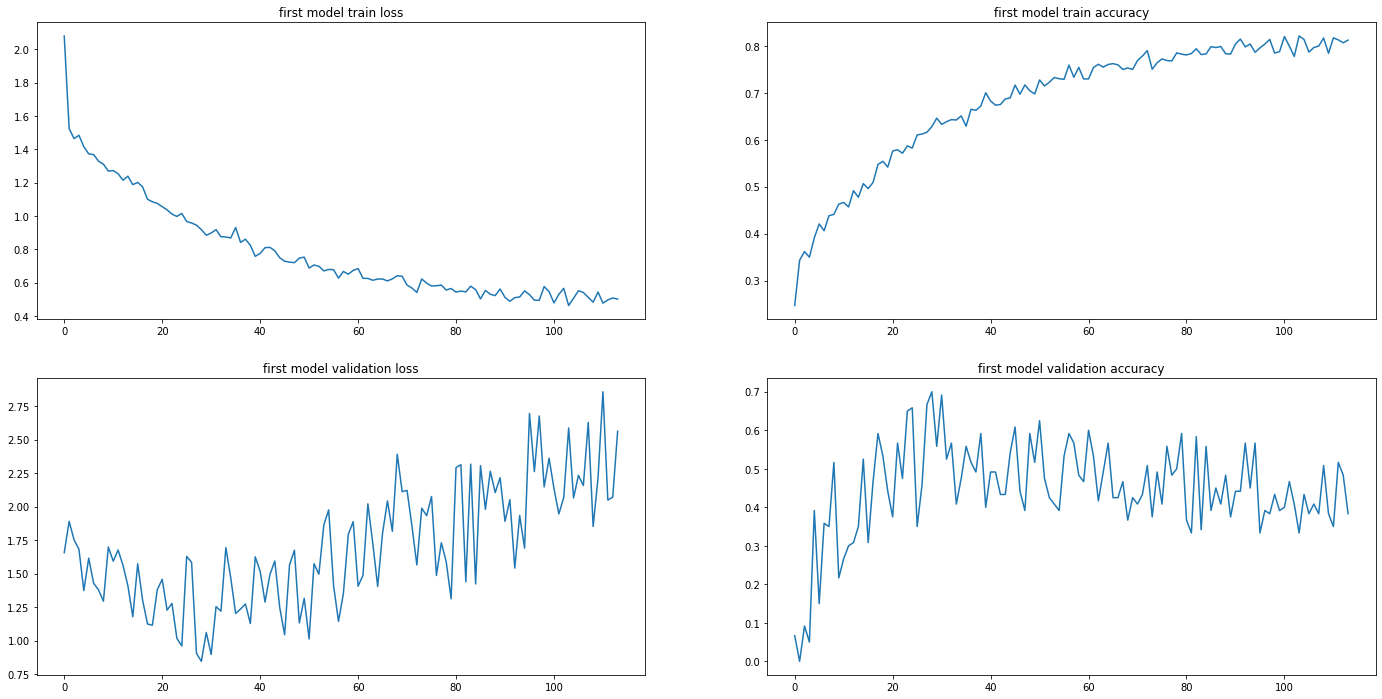

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,12))

ax[0][0].plot(first_results.history["loss"])
ax[0][1].plot(first_results.history["accuracy"])
ax[1][0].plot(first_results.history["val_loss"])
ax[1][1].plot(first_results.history["val_accuracy"])

ax[0][0].set_title("first model train loss")
ax[0][1].set_title("first model train accuracy")
ax[1][0].set_title("first model validation loss")
ax[1][1].set_title("first model validation accuracy")
plt.show()

**3. Second model:**

In [13]:
second_model = Sequential([
    Conv2D(filters=8, kernel_size=3, padding='same', activation='relu', 
           input_shape=(384, 512, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=24, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=40, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=48, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Dropout(0.5),

    Flatten(),
    
    Dense(5, activation='softmax')
])

second_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 384, 512, 8)       224       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 192, 256, 8)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 192, 256, 16)      1168      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 96, 128, 16)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 96, 128, 24)       3480      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 48, 64, 24)      

In [14]:
second_model.compile(optimizer="adam", 
                     loss="sparse_categorical_crossentropy", 
                     metrics=["accuracy"])

In [16]:
second_results = second_model.fit(x,
                                  train_y,
                                  validation_split=0.05,
                                  epochs=200,
                                  callbacks=[early_stop])

Epoch 1/200
71/71 [==============================] - 10s 140ms/step - loss: 1.0491 - accuracy: 0.5674 - val_loss: 1.2737 - val_accuracy: 0.4500
Epoch 2/200
71/71 [==============================] - 10s 139ms/step - loss: 1.0461 - accuracy: 0.5921 - val_loss: 1.6254 - val_accuracy: 0.2833
Epoch 3/200
71/71 [==============================] - 10s 139ms/step - loss: 1.0133 - accuracy: 0.5863 - val_loss: 1.1574 - val_accuracy: 0.5083
Epoch 4/200
71/71 [==============================] - 10s 139ms/step - loss: 0.8876 - accuracy: 0.6392 - val_loss: 1.1130 - val_accuracy: 0.5417
Epoch 5/200
71/71 [==============================] - 10s 139ms/step - loss: 0.8916 - accuracy: 0.6361 - val_loss: 1.7410 - val_accuracy: 0.3000
Epoch 6/200
71/71 [==============================] - 10s 140ms/step - loss: 0.8421 - accuracy: 0.6643 - val_loss: 0.9776 - val_accuracy: 0.5833
Epoch 7/200
71/71 [==============================] - 10s 139ms/step - loss: 0.8166 - accuracy: 0.6859 - val_loss: 1.3951 - val_accuracy:

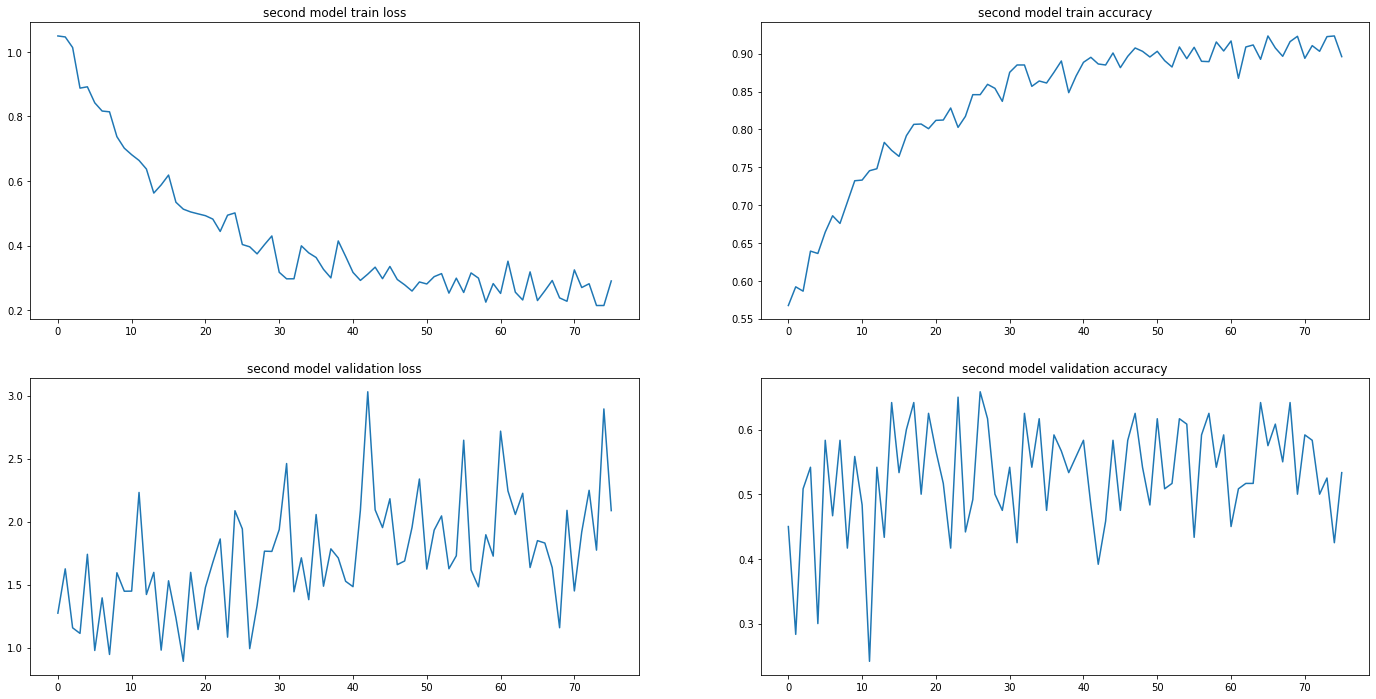

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,12))

ax[0][0].plot(second_results.history["loss"])
ax[0][1].plot(second_results.history["accuracy"])
ax[1][0].plot(second_results.history["val_loss"])
ax[1][1].plot(second_results.history["val_accuracy"])

ax[0][0].set_title("second model train loss")
ax[0][1].set_title("second model train accuracy")
ax[1][0].set_title("second model validation loss")
ax[1][1].set_title("second model validation accuracy")
plt.show()

**4. Third model:**

In [22]:
third_model = Sequential([
    Conv2D(filters=8, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu', input_shape=(384, 512, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=10, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=12, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=14, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Dropout(0.5),

    Flatten(),
    
    Dense(5, activation='softmax')
])

third_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 384, 512, 8)       224       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 192, 256, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 192, 256, 10)      730       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 96, 128, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 96, 128, 12)       1092      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 48, 64, 12)      

In [23]:
third_model.compile(optimizer="adam", 
                    loss="sparse_categorical_crossentropy", 
                    metrics=["accuracy"])

In [24]:
third_results = third_model.fit(x,
                                train_y,
                                validation_split=0.05,
                                epochs=200,
                                callbacks=[early_stop])

Epoch 1/200
71/71 [==============================] - 10s 126ms/step - loss: 7.5369 - accuracy: 0.2762 - val_loss: 4.8207 - val_accuracy: 0.1417
Epoch 2/200
71/71 [==============================] - 9s 121ms/step - loss: 4.0377 - accuracy: 0.3859 - val_loss: 3.9917 - val_accuracy: 0.2500
Epoch 3/200
71/71 [==============================] - 9s 121ms/step - loss: 3.4655 - accuracy: 0.4700 - val_loss: 3.3546 - val_accuracy: 0.3667
Epoch 4/200
71/71 [==============================] - 9s 121ms/step - loss: 3.0832 - accuracy: 0.5300 - val_loss: 2.8683 - val_accuracy: 0.6167
Epoch 5/200
71/71 [==============================] - 9s 122ms/step - loss: 2.7930 - accuracy: 0.5793 - val_loss: 3.0069 - val_accuracy: 0.3917
Epoch 6/200
71/71 [==============================] - 9s 120ms/step - loss: 2.5613 - accuracy: 0.6251 - val_loss: 3.1511 - val_accuracy: 0.3333
Epoch 7/200
71/71 [==============================] - 9s 121ms/step - loss: 2.3517 - accuracy: 0.6656 - val_loss: 2.8925 - val_accuracy: 0.408

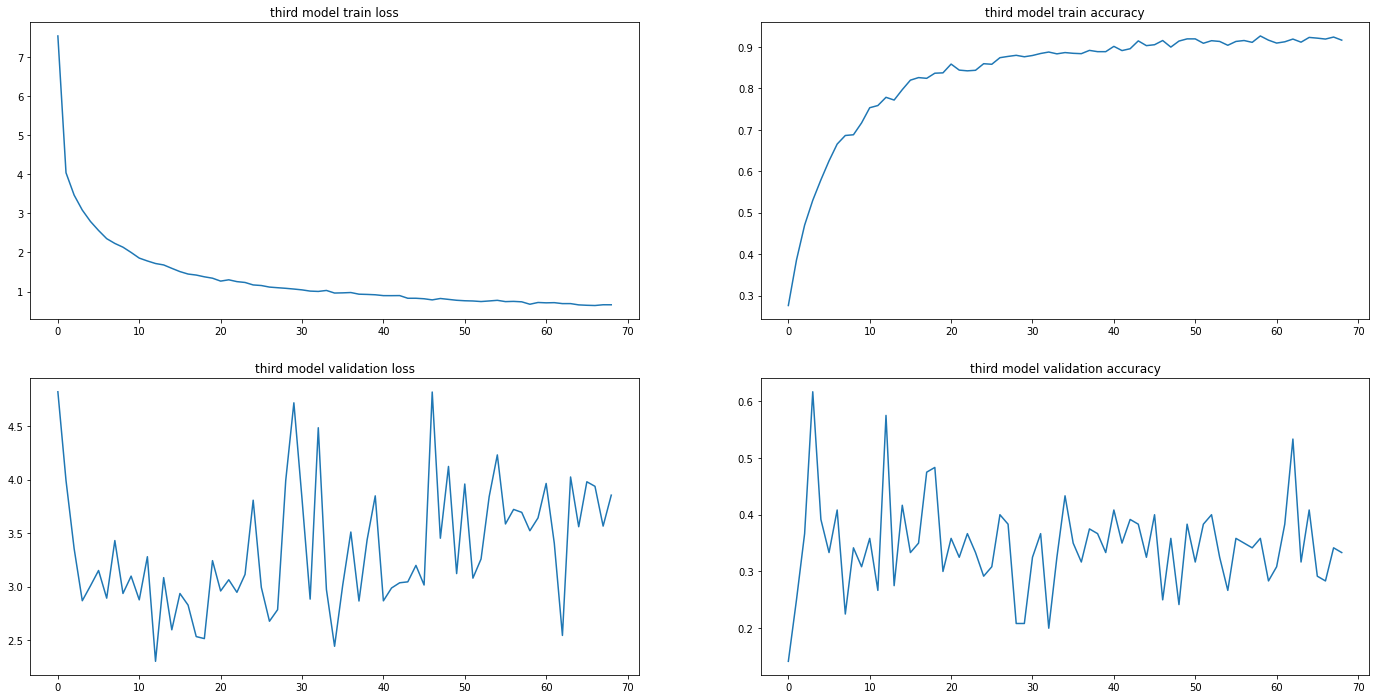

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,12))

ax[0][0].plot(third_results.history["loss"])
ax[0][1].plot(third_results.history["accuracy"])
ax[1][0].plot(third_results.history["val_loss"])
ax[1][1].plot(third_results.history["val_accuracy"])

ax[0][0].set_title("third model train loss")
ax[0][1].set_title("third model train accuracy")
ax[1][0].set_title("third model validation loss")
ax[1][1].set_title("third model validation accuracy")
plt.show()